In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [3]:
data=pd.read_csv("Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
data.duplicated().sum()

4

In [15]:
data.drop_duplicates(inplace=True)

In [17]:
data["Age"].replace(0,"NaN")

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 144, dtype: object

In [21]:
data.fillna(data.Age.mean())

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,30.527559,Chennai,India,0
1,Infosys,30.0,30.527559,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


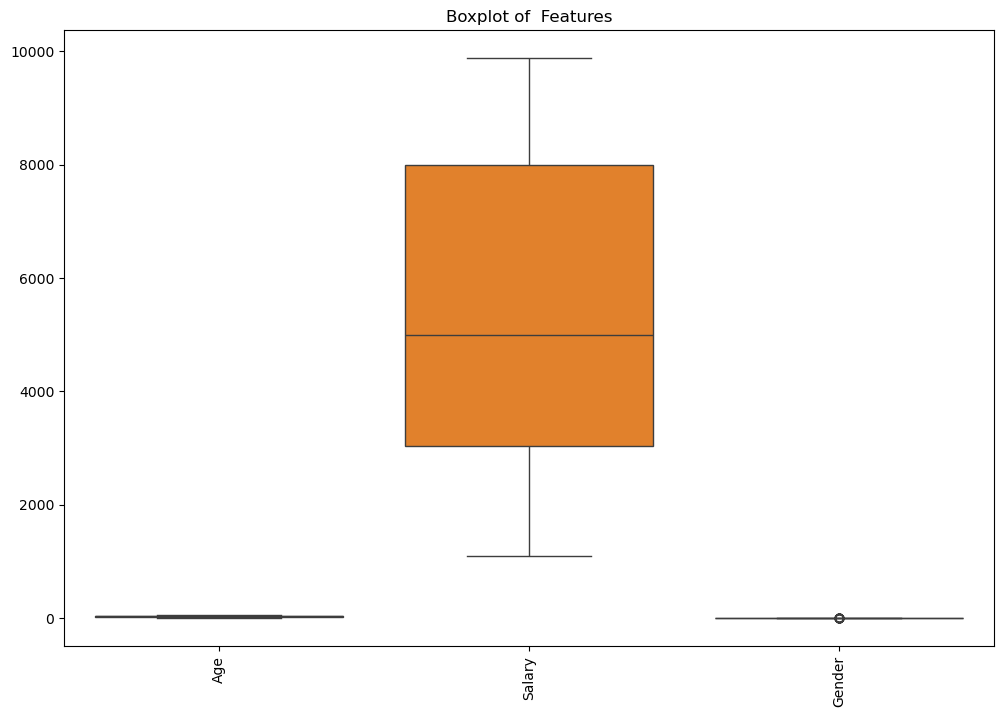

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [27]:
filtered = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


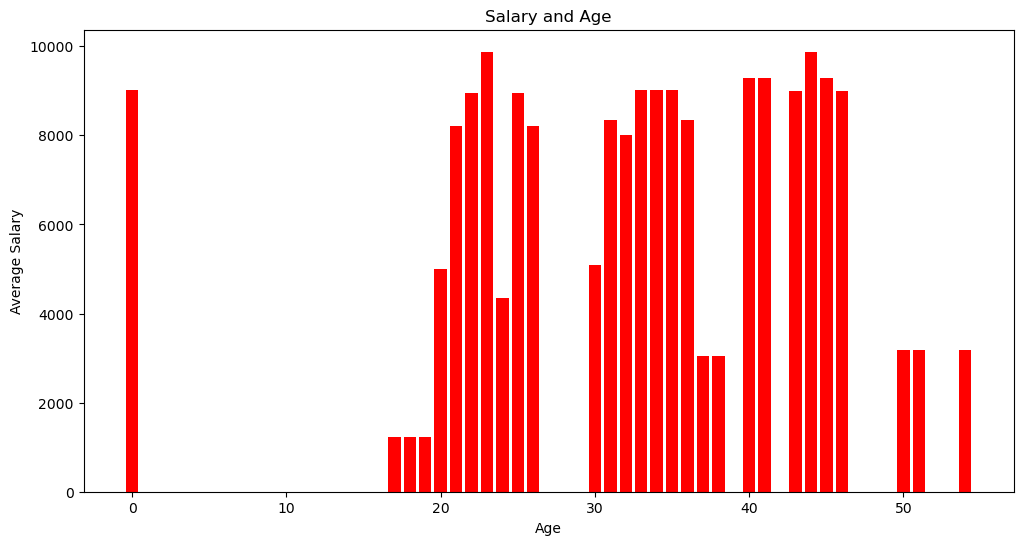

In [75]:
plt.figure(figsize=(12, 6))
plt.bar(data['Age'], data['Salary'], color="red")
plt.title('Salary and Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.show()

In [55]:
places=data['Place'].value_counts().reset_index()
places

,Place,count
0,Mumbai,34
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


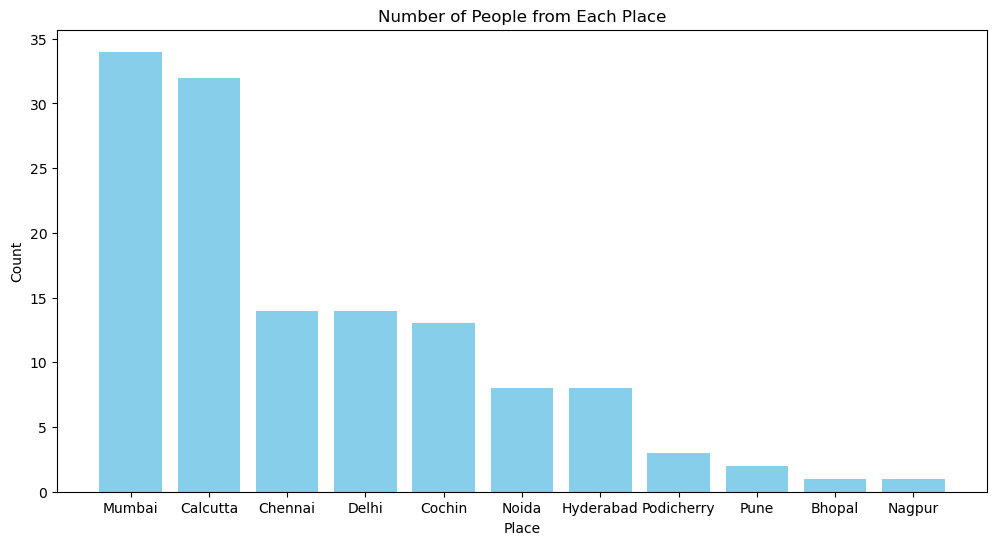

In [67]:
plt.figure(figsize=(12, 6))
plt.bar(places['Place'], places['count'], color='skyblue')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [97]:
label_encoder = LabelEncoder()
data['Place_LabelEncoded'] = label_encoder.fit_transform(data['Place'])
print(data[['Place', 'Place_LabelEncoded']].head())

      Place  Place_LabelEncoded
0   Chennai                   2
1    Mumbai                   6
2  Calcutta                   1
3     Delhi                   4
4    Mumbai                   6


In [105]:
# onehotdata = pd.get_dummies(data, columns=['Company'], prefix="Company")
# print(onehotdata.head())

In [103]:
data['CompanyEncoded'] = label_encoder.fit_transform(data['Company'])
print(data[['Company', 'CompanyEncoded']].head())

   Company  CompanyEncoded
0      TCS               4
1  Infosys               2
2      TCS               4
3  Infosys               2
4      TCS               4


In [109]:
onehotgender = pd.get_dummies(data, columns=['Gender'], prefix='Gender')
print(onehotgender.head())

   Company   Age  Salary     Place Country  Place_LabelEncoded  \
0      TCS  20.0     NaN   Chennai   India                   2   
1  Infosys  30.0     NaN    Mumbai   India                   6   
2      TCS  35.0  2300.0  Calcutta   India                   1   
3  Infosys  40.0  3000.0     Delhi   India                   4   
4      TCS  23.0  4000.0    Mumbai   India                   6   

   CompanyEncoded  Gender_0  Gender_1  
0               4      True     False  
1               2      True     False  
2               4      True     False  
3               2      True     False  
4               4      True     False  


In [113]:
dataencoded = pd.get_dummies(data, columns=['Place', 'Company', 'Gender'], drop_first=True)
numerical_features = dataencoded[['Age', 'Salary']]

In [123]:
scaler = StandardScaler()
dataencoded[['Scaledage', 'Scaledsalary']] = scaler.fit_transform(numerical_features)
print(dataencoded[['Age', 'Salary', 'Scaledage', 'Scaledsalary']].head())

    Age  Salary  Scaledage  Scaledsalary
0  20.0     NaN  -0.950924           NaN
1  30.0     NaN  -0.047653           NaN
2  35.0  2300.0   0.403983     -1.158779
3  40.0  3000.0   0.855618     -0.886899
4  23.0  4000.0  -0.679943     -0.498500


In [125]:
minmax_scaler = MinMaxScaler()
dataencoded[['minmaxage', 'minmaxsalary']] = minmax_scaler.fit_transform(numerical_features)

print(dataencoded[['Age', 'Salary', 'minmaxage', 'minmaxsalary']].head())

    Age  Salary  minmaxage  minmaxsalary
0  20.0     NaN   0.370370           NaN
1  30.0     NaN   0.555556           NaN
2  35.0  2300.0   0.648148      0.137817
3  40.0  3000.0   0.740741      0.217480
4  23.0  4000.0   0.425926      0.331285
